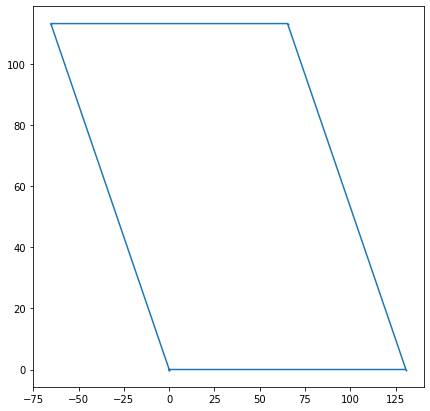

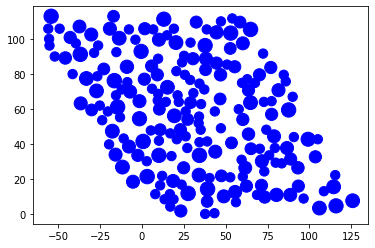

In [52]:
#animation for the result

import numpy as np
import timeit, math, copy
import param
from scipy.special import expit          # for handling very small exp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import ScalarFormatter
from matplotlib import animation

dataForAnimation = []
radiusForAnimation = []

# adding information into dataForAnimation
with open('metropolis','r') as f1:
    information = f1.readlines()
    startIndex = 0
    for index in range(param.MMAX + 1):
        numberOfCluster = int(information[startIndex].split()[5])
        dataSet = []
        radiusSet = []
        for i in range(startIndex + 2, startIndex + 2 + numberOfCluster ): # only adding [0] = x, [1] = y
            dataSet.append((float(information[i].split()[2]) , float(information[i].split()[3])))
            radiusSet.append(50*float(information[i].split()[1]))
        radiusForAnimation.append(radiusSet)
        dataForAnimation.append(dataSet)
        startIndex = startIndex + 2 + numberOfCluster + 1

        
# plotting the boundary
plt.figure(figsize=(7,7))
boundaryDots_X = [0, param.maxx, param.maxx - param.maxy / np.sqrt(3), - param.maxy / np.sqrt(3), 0 ]
boundaryDots_Y = [0, 0, param.maxy, param.maxy, 0]
plt.plot(boundaryDots_X, boundaryDots_Y,marker="o", markerfacecolor="none", ms=1)


glider = set(dataForAnimation[0])

fig = plt.figure()

x, y = zip(*glider)
scat = plt.scatter(x, y, c='b', s=radiusForAnimation[0] )

def animate(i):
    if i <= param.MMAX:
        scat.set_offsets( dataForAnimation[i])
        scat.set_sizes(radiusForAnimation[i])
    return scat,


ani = animation.FuncAnimation(fig, animate, frames=range(param.MMAX+1))

ani.save('output1.gif', writer='pillow')

In [3]:
for la in range(0,10):
    print(la)

0
1
2
3
4
5
6
7
8
9


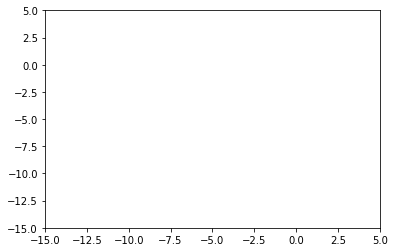

In [14]:
#testing1
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def neighbors(point):
    x, y = point
    for i, j in itertools.product(range(-1, 2), repeat=2):
        if any((i, j)):
            yield (x + i, y + j)

def advance(board):
    newstate = set()
    recalc = board | set(itertools.chain(*map(neighbors, board)))

    for point in recalc:
        count = sum((neigh in board)
                for neigh in neighbors(point))
        if count == 3 or (count == 2 and point in board):
            newstate.add(point)

    return newstate

glider = set([(0, 0), (1, 0), (2, 0), (0, 1), (1, 2)])

fig, ax = plt.subplots()

x, y = zip(*glider)
mat, = ax.plot(x, y, 'o')

def animate(i):
    global glider
    glider = advance(glider)
    x, y = zip(*glider)
    mat.set_data(x, y)
    return mat,

ax.axis([-15,5,-15,5])
ani = animation.FuncAnimation(fig, animate, interval=50)

ani.save('output.gif', writer='pillow')

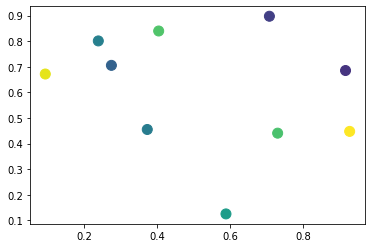

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

#testing 2
    
def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,

numframes = 100
numpoints = 10
color_data = np.random.random((numframes, numpoints))
x, y, c = np.random.random((3, numpoints))

fig = plt.figure()
scat = plt.scatter(x, y, c=c, s=100)

ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(color_data, scat))
ani.save('output.gif', writer='pillow')